In [9]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor # 회귀분석, 예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [10]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

In [11]:
# perch_length = [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
#      21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
#      22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
#      27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
#      36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
#      40.0, 42.0, 43.0, 43.0, 43.5, 44.0]

# perch_weight = [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
#      110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
#      130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
#      197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
#      514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
#      820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
#      1000.0, 1000.0]
# df = pd.DataFrame([perch_length,perch_weight])
# df = df.T
# df

Text(0, 0.5, 'weight')

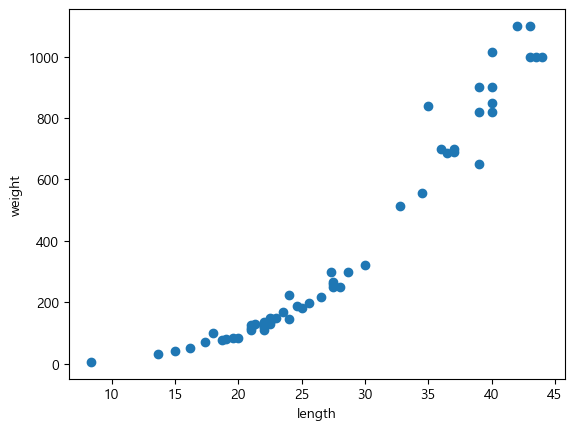

In [12]:
# 산점도로 출력하시오.
# x축은 길이df[0], y축은 무게df[1]
plt.scatter(perch_length,perch_weight)
# plt.plot(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')

 머신러닝 구현
 1. 데이터 전처리: Nan,0,축의 단위(범위),훈련&테스트세트 분리
 2. 데이터 학습
 3. 데이터 예측
 4. 예측(결과) 하기

In [13]:
# 머신러닝 구현
# 1. 데이터 전처리: Nan,0,축의 단위(범위),훈련&테스트세트 분리
train_input,test_input,train_target,test_target = train_test_split(
    perch_length,perch_weight
)
train_input


array([28.7, 25. , 35. , 39. , 22. , 36. , 24. , 32.8, 43. , 23. , 26.5,
       22.5, 16.2, 37. , 22. , 40. , 21. , 23.5, 27.5, 28. , 24. , 22.5,
       42. , 39. , 40. , 27.5, 22. , 18. , 37. , 22. , 17.4, 22. , 22.7,
       34.5, 25.6, 36.5, 40. , 43.5, 27.5, 27.3, 13.7, 39. ])

In [14]:
# 알고리즘 구현을 위한 2차원 행렬로 변경.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [15]:
train_input.shape

(42, 1)

In [16]:
# 총 갯수: 56
train_input.shape # 42
test_input.shape # 14

(14, 1)

In [17]:
# 2. 데이터 학습
knr = KNeighborsRegressor()
knr.fit(train_input,train_target)


KNeighborsRegressor()

In [18]:
# 예측의 오차범위: 평균 절대값 오차
from sklearn.metrics import mean_absolute_error
predict = knr.predict(test_input)
# 무게예측
print('예측값: ', predict)

예측값:  [ 857.   121.    93.3  183.4  121.  1007.  1007.   265.   115.   105.
   93.3   72.7   72.7  121. ]


In [19]:
# 3. 데이터 예측
score = knr.score(test_input,test_target)
score

0.9939005863541759

In [20]:
test_neam = mean_absolute_error(test_target,predict)